
# Cartopy for Climate Scientists & Meteorologists

This hands-on notebook teaches **Cartopy** for climate & weather mapping using realistic, self-contained examples.

**You will learn to:**
- Understand **map projections** and `GeoAxes`
- Use the `projection=` (axes) vs. `transform=` (data) keywords correctly
- Explore common climate projections (PlateCarree, Lambert Conformal, Robinson, Orthographic)
- Create **regional maps** (e.g., Ethiopia) and overlay data
- Style maps with **Natural Earth** features (coastlines, borders)
- Add **gridlines and tick labels**
- Read **Natural Earth** shapefiles at low resolution (110m) directly
- Combine Cartopy with **Matplotlib** (subplots, colorbars)



## Environment & Installation

Recommended (conda, works cross-platform):

```bash
conda create -n cartopy_env python=3.11 -y
conda activate cartopy_env
conda install -c conda-forge cartopy matplotlib numpy geopandas shapely pyproj rasterio rioxarray xarray -y

pip install cartopy

```
- Cartopy uses **PROJ**, **GEOS**, and **Shapely** under the hood. 

- The conda-forge channel bundles compatible binaries.


## Imports

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# Set default figure size and define Ethiopia extent
plt.rcParams['figure.figsize'] = (7.5, 5.5)
ETH_EXTENT = [33, 48, 3, 15]  # Ethiopia approx

In [3]:
# Check Cartopy version
import cartopy
print("Cartopy version:", cartopy.__version__)

Cartopy version: 0.25.0



## Core concepts: Projections and GeoAxes

- Every Cartopy map lives on a **GeoAxes** with a **projection**:

  ```bash
  ax = plt.axes(projection=ccrs.PlateCarree())
  ```
- Your **data** (lon/lat grids, shapely geometries) have their own coordinate system. 
 
- When plotting data, specify the **data CRS** via `transform=` so Cartopy can project it onto the axes projection.


## Your first Cartopy map

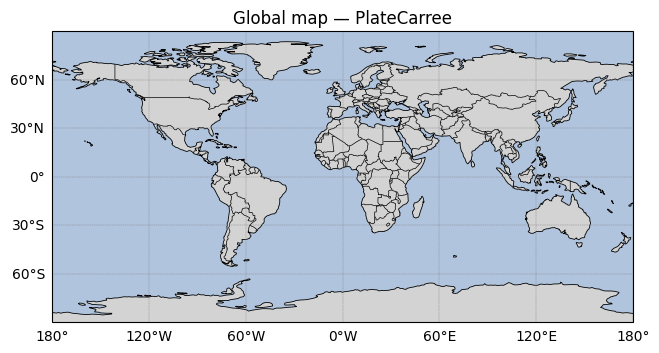

In [5]:
# Create a global map using PlateCarree projection
proj = ccrs.PlateCarree()

# Create figure and GeoAxes
fig = plt.figure()

# Create GeoAxes with PlateCarree projection
ax = plt.axes(projection=proj)

# Add features to the map Land, Ocean, Borders, Coastlines
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.coastlines(resolution='110m', linewidth=0.6) # 
ax.set_global()

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True,
                   linewidth=0.3, 
                   color='gray', 
                   linestyle='--',
                  x_inline=False, 
                  y_inline=False)

# Disable top and right labels
gl.top_labels = False

# Disable right labels
gl.right_labels = False

# Set custom formatters for longitude and latitude
gl.xformatter = LongitudeFormatter(
    zero_direction_label=True,)   
 
gl.yformatter = LatitudeFormatter()

ax.set_title("Global map — PlateCarree")
plt.show()


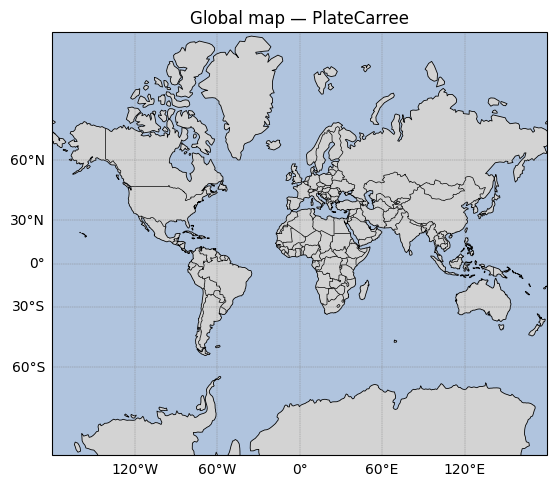

In [14]:
proj = ccrs.Mercator() # ccrs.Mercator(), ccrs.Robinson(), ccrs.Mollweide(), ccrs.EqualEarth(), ccrs.LambertCylindrical(), etc.
fig = plt.figure()
ax = plt.axes(projection=proj)

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.coastlines(resolution='110m', linewidth=0.6) # 
ax.set_global()

gl = ax.gridlines(draw_labels=True,
                   linewidth=0.3, 
                   color='gray', 
                   linestyle='--',
                  x_inline=False, 
                  y_inline=False)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

ax.set_title("Global map — PlateCarree")
plt.show()

## Exploring several projections

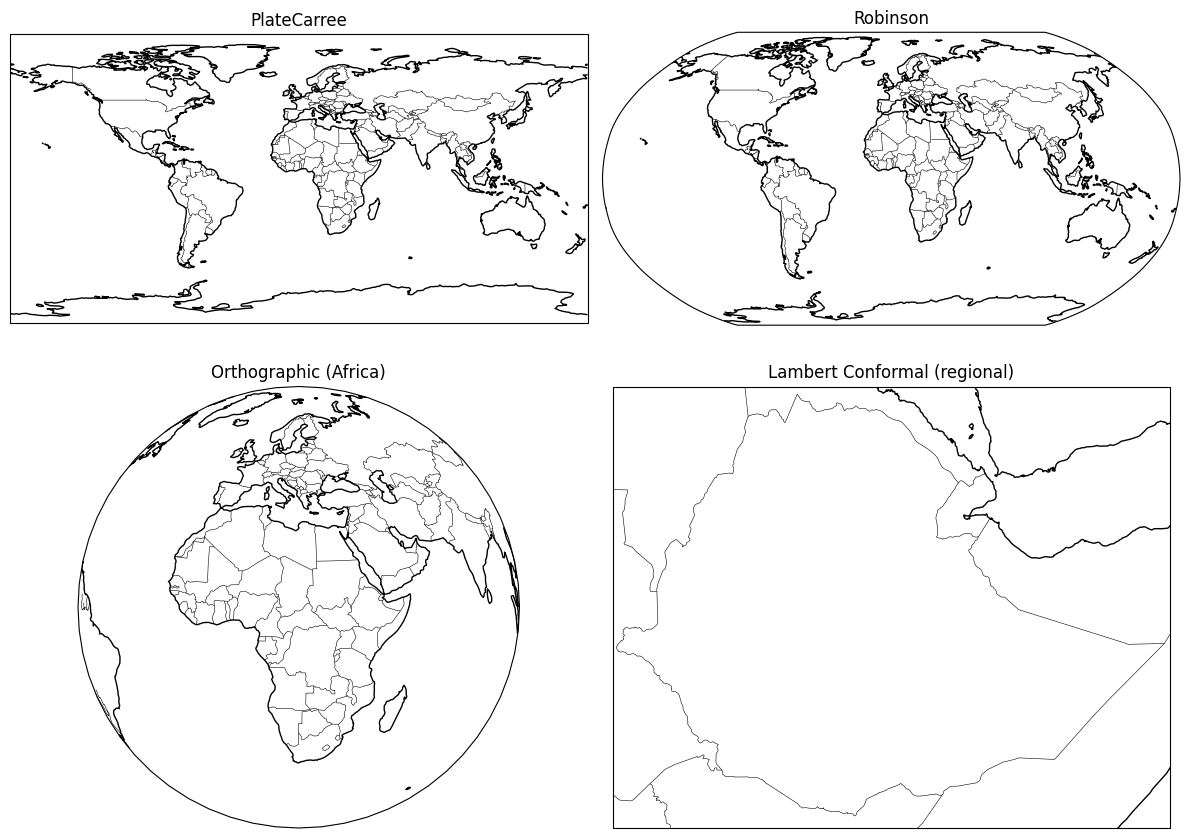

In [16]:
# Create 4 subplots with different projections
fig = plt.figure(figsize=(12, 9))

# Subplot 1: PlateCarree projection
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines('110m'); ax1.add_feature(cfeature.BORDERS, linewidth=0.4)
ax1.set_global(); ax1.set_title("PlateCarree")

# Subplot 2: Robinson projection
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Robinson())
ax2.coastlines('110m'); ax2.add_feature(cfeature.BORDERS, linewidth=0.4)
ax2.set_global(); ax2.set_title("Robinson")

# Subplot 3: Orthographic projection centered on Africa
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(central_longitude=20, central_latitude=10))
ax3.coastlines('110m'); ax3.add_feature(cfeature.BORDERS, linewidth=0.4)
ax3.set_global(); ax3.set_title("Orthographic (Africa)")


# Subplot 4: Lambert Conformal projection focused on Ethiopia
ax4 = plt.subplot(2, 2, 4, projection=ccrs.LambertConformal(central_longitude=40, central_latitude=9, standard_parallels=(5, 15)))
ax4.coastlines('10m'); ax4.add_feature(cfeature.BORDERS, linewidth=0.4)
ax4.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree()); ax4.set_title("Lambert Conformal (regional)")

plt.tight_layout()
plt.show()

## Creating regional maps (Ethiopia extent)

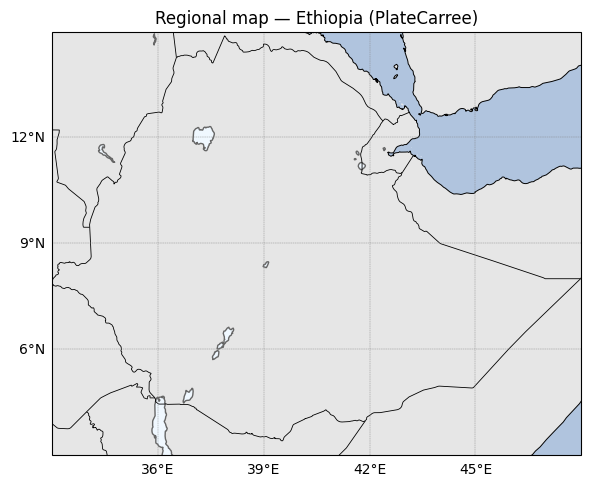

In [7]:

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='0.9')
ax.add_feature(cfeature.OCEAN, facecolor='lightsteelblue')
ax.add_feature(cfeature.LAKES, edgecolor='0.4', facecolor='aliceblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.coastlines('10m', linewidth=0.7)

gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', linestyle='--',
                  x_inline=False, y_inline=False)
gl.top_labels = False; gl.right_labels = False
gl.xformatter = LongitudeFormatter(); gl.yformatter = LatitudeFormatter()
gl.xlocator = mticker.FixedLocator(np.arange(33, 49, 3))
gl.ylocator = mticker.FixedLocator(np.arange(3, 16, 3))

ax.set_title("Regional map — Ethiopia (PlateCarree)")
plt.show()


## Cartopy + Matplotlib: overlay a synthetic climate field

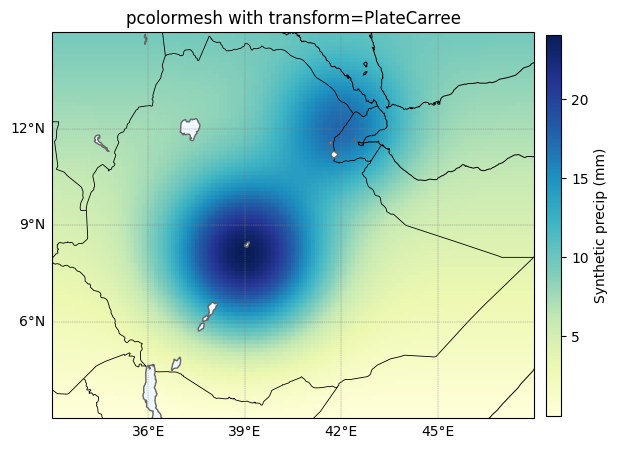

In [8]:

# Lon/lat grid and synthetic field
lons = np.linspace(33, 48, 121)
lats = np.linspace(3, 15, 97)
lon2d, lat2d = np.meshgrid(lons, lats)
field = (20*np.exp(-((lon2d-39)**2 + (lat2d-8)**2)/6.0)
         + 10*np.exp(-((lon2d-42)**2 + (lat2d-12)**2)/4.0)
         + 0.8*(lat2d-3))

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree())

im = ax.pcolormesh(lons, lats, field, cmap='YlGnBu', shading='auto',
                   transform=ccrs.PlateCarree())

ax.coastlines('10m', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.LAKES, edgecolor='0.4', facecolor='aliceblue')

gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', linestyle='--',
                  x_inline=False, y_inline=False)
gl.top_labels=False; gl.right_labels=False
gl.xformatter=LongitudeFormatter(); gl.yformatter=LatitudeFormatter()
gl.xlocator = mticker.FixedLocator(np.arange(33, 49, 3))
gl.ylocator = mticker.FixedLocator(np.arange(3, 16, 3))

cb = plt.colorbar(im, ax=ax, pad=0.02, shrink=0.9, aspect=25)
cb.set_label("Synthetic precip (mm)")

ax.set_title("pcolormesh with transform=PlateCarree")
plt.show()


## The Cartopy Feature interface

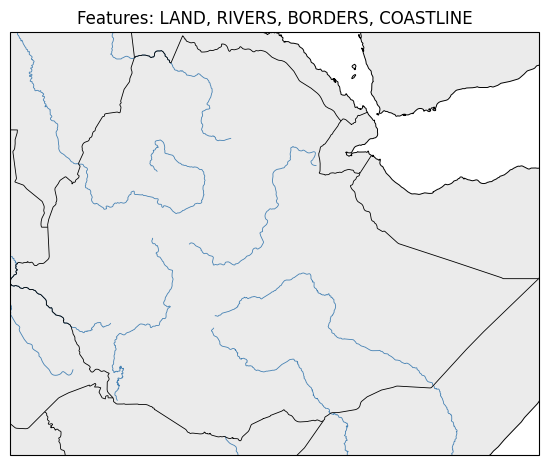

In [9]:

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='0.92')
ax.add_feature(cfeature.RIVERS, edgecolor='steelblue', linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.coastlines('10m', linewidth=0.7)

ax.set_title("Features: LAND, RIVERS, BORDERS, COASTLINE")
plt.show()


## Gridlines & tick labels — fine control

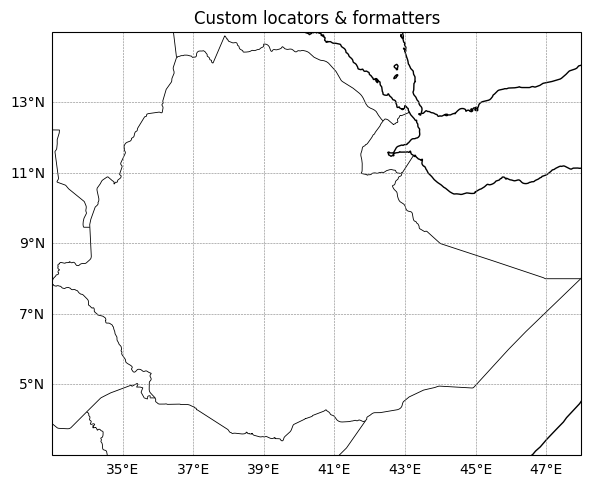

In [10]:

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree())
ax.coastlines('10m'); ax.add_feature(cfeature.BORDERS, linewidth=0.6)

gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', linestyle='--',
                  x_inline=False, y_inline=False)
gl.top_labels = False; gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlocator = mticker.FixedLocator(np.arange(33, 49, 2))
gl.ylocator = mticker.FixedLocator(np.arange(3, 16, 2))

ax.set_title("Custom locators & formatters")
plt.show()


## Use lower-resolution Natural Earth shapefiles (110m)

c:\Users\yonas\Documents\ICPAC\python-ml-gha-venv\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


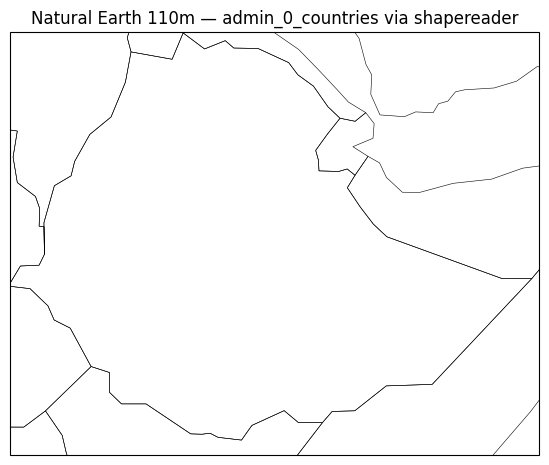

In [ ]:

shp_countries = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries') # reslution 110m, 
reader = shpreader.Reader(shp_countries)
geoms  = list(reader.geometries())

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(ETH_EXTENT, crs=ccrs.PlateCarree())
ax.add_geometries(geoms, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.4)
ax.set_title("Natural Earth 110m — admin_0_countries via shapereader")
plt.show()



## Exercises

1. **Lambert Conformal panel:** Plot the synthetic field on Lambert Conformal and add a horizontal colorbar with `shrink` and `pad` tuned for aesthetics.
2. **Shared colorbar (1×3):** PlateCarree, Robinson, Orthographic subplots with a single shared colorbar axis created via `GridSpec`.
3. **Region of interest box:** Overlay a shapely `box(36, 7, 44, 11)` and label its centroid. Export the figure as PNG and SVG.
4. **Resolution tradeoffs:** Compare coastlines at `'110m'`, `'50m'`, and `'10m'` within the same extent; note performance vs. detail.
5. **Tick styling:** Use `LongitudeFormatter(number_format='.1f')` and `LatitudeFormatter(number_format='.1f')` to show one decimal place on tick labels.



## Tips & Troubleshooting

- First run may **download** Natural Earth layers to a local cache (keep internet on).
- Always set the **data CRS** using `transform=` when the axes projection differs from the data.
- For panels, control colorbar with `fraction`, `pad`, `shrink`, and `aspect`.
- Prefer `'110m'` for drafts and `'10m'` for final figures.
